# Genetic Data Associated with Avian Keratin Disorder and Poecivirus in Black-capped Chickadees, Alaska, 2001-2017

This dataset contains results of genetic screening for Poecivirus from samples of black-capped chickadees (BCCH; Poecile atricapillus) with and without clinical signs of avian keratin disorder (AKD). Data include information on detection/non-detection of the virus in tissue collected with buccal swabs, cloacal swabs, blood samples, and fecal samples from up to 124 individuals between 2015 and 2017 from various locations in southcentral Alaska. For an additional 17 symptomatic (and one asymptomatic) individual(s) collected between 2001 and 2015 in the same region, data include measurements of viral load in beak tissue measured by qRT-PCR as well as the amount of actively replicating virus detected by 7 negative-strand and 2 positive-strand oligonucleotide probes, all relative to amounts of host RNA. Ancillary data on beak measurements, clinical signs of AKD (beak overgrowth or hyperkeratosis at the cellular level), locations, and dates of collection are also included for each individual.

[source](https://alaska.usgs.gov/data/metadata/ecosystems/landBirds/disease/poecivirus/blackCappedChickadee/blackCappedChickadee_poecivirus_southcentralAlaska_zylberberg_2001_2017/blackCappedChickadee_poecivirus_southcentralAlaska_zylberberg_2001_2017_metadata.html)

## More about <font color=red>Avian keratin disorder</font>



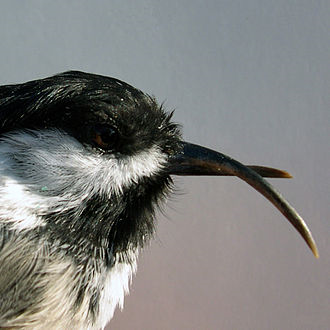


In **AKD**, accelerated growth of the keratinized outer layer of the beak (the rhamphotheca). causes elongation and crossing of the mandibles of the beak. This is debilitating and often deadly, as it obstructs the birds' ability to feed and preen themselves, with the resulting dirty and matted plumage unable to play its role in thermoregulation. [Wikipedia](https://en.wikipedia.org/wiki/Avian_keratin_disorde)



## A video

If you want to know how to add a video from You tube to a jupyter notebook or you want to know more about this disorder:



In [ ]:
#import the tools
from IPython.display import HTML

from IPython.lib.display import YouTubeVideo
#from the web address (https://www.youtube.com/watch?v=Xdwd910Qfl4) just use the part after the = sign
YouTubeVideo('Xdwd910Qfl4')

In [ ]:
# Import some tools
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the data into a dataframe using Pandas
df = pd.read_csv('../data/blackCappedChickadee_poecivirus_swabFecalBlood_southcentralAlaska_zylberberg_2001_2017.csv')
df.head()

### Number of sick birds in each location.

In [ ]:
# Here we used the Construction Price Indexes jupyter notebook codes to show how you can use them to extract
# some information from the data set.
# Define a "show" function - note the default value for the (now) optional parameter.
#  dataset is a list of lists of strings.
def show(dataset = [["No dataset sent"]]):
    for r in dataset:
        # print elements in a tab-separated format
        print ("\t".join(r))


In [ ]:
# Grab all the lines from the file starting with line 2, strip
# the newline and tokenize
with open("../data/blackCappedChickadee_poecivirus_swabFecalBlood_southcentralAlaska_zylberberg_2001_2017.csv") as f:
    vdataset = [line.rstrip().split(',') for line in f.readlines()[1:]]
# show the data
show(vdataset)




In [ ]:
# Here we constructed a list of locations and then counted the number of sick birds
# that is observed in each location.
Locations_list=["Anchorage", "Chugiak", "Eagle River", "Wasilla" ]
for j in Locations_list:
   count=0
   for p in vdataset:
       if p[6]==j and p[11]=="yes":
                count+=1
   print  ("{:} sick birds in {:}".format(count, j))


### Number of observations in each day.

In [ ]:
# Here we counted the number of observations in each day
daylist=[]
for p in vdataset:
    if p[4]+"/"+p[5]+"/"+p[3] in daylist:
              pass
    else:
        daylist.append(p[4]+"/"+p[5]+"/"+p[3])

for j in daylist:
   count=0
   for p in vdataset:
       if (p[4]+"/"+p[5]+"/"+p[3])==j:
                count+=1
   print  ("{:} observaions in {:}".format(count, j))

### Number of sick birds in each year.

In [ ]:
# Here we counted the number of sick birds in each year.
year_list=["2015", "2016", "2017"]
for j in year_list:
   count=0
   for p in vdataset:
       if p[3]==j and p[11]=="yes":
                count+=1
   print  ("{:} sick birds in {:}".format(count, j))

## Some examples for Numpy

In [ ]:
# some statistics about the nares to tip measure
# First put the column in a Numpy array
length=np.array(df['nares_to_tip'])


In [ ]:
# min, max, std and average of the nares to tip measure
print("Mean length:       ", length.mean())
print("Standard deviation:", length.std())
print("Minimum length:    ", length.min())
print("Maximum length:    ", length.max())

In [ ]:
# 25th, 50th, and 75th percentile
print("25th percentile:   ", np.percentile(length, 25))
print("Median:            ", np.median(length))
print("75th percentile:   ", np.percentile(length, 75))

In [ ]:
# If we want to change centimeters to inches:
length_in_inch=length*0.393701
length_in_inch


In [ ]:
# How many birds with nares to tip measure less than 7 centimeters?
# To know more about the count_nonzero check this website address:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.count_nonzero.html
np.count_nonzero(length < 7)

In [ ]:
# How many birds are sick?
akd=df['akd']
np.count_nonzero(akd=="yes")

In [ ]:
# How many birds that their nares to tip measure is lesser than 10 cm are sick?
# To know more about the sum check this website address:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
np.sum((length < 10) & (akd == "yes"))

In [ ]:
# construct a mask of all sick brids
sick = (akd == "yes")

# construct a mask of all birds with nares to tip measure that is bigger than 10 cm
big = (length>10)

print("Median length for the birds that are bigger than 10 cm:   ",
      np.median(length[big]))
print("Median length for sick birds that are not bigger than 10 cm:",
      np.median(length[sick & ~big]))

## Some examples for Pandas

In [ ]:
# listing items that are available in the data frame
list(df.items())

### Some information about the sick birds
Here we are looking for the band numbers, location, observation date of sick birds. 

In [ ]:
# To know more about the loc() check this website address:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html
# Here we searched for the birds that are sick (in 'akd' column the value is 'yes' for them) 
# and showed the band_number, location, year, month, and day columns for them.
df.loc[(df['akd']== 'yes')  ,['band_number', 'location', 'year', 'month', 'day']]

### The relation between the virus and AKD
Based on the **Wikipedia** we are not sure that if there is a relationship between virus and the disease. Here we listed the birds that has AKD and poecivirus is detected in their cloacal swab. 

In [ ]:
# Here we used '&' to show the birds that had the akd and had the virus in their cloacal swab sample to see if there is a
# relation between them (However, we did not used statistical methods)
df.loc[(df['cloacal_swab_poecivirus_detected']=='yes') & (df['akd']== 'yes'),['band_number', 'location', 'year', 'month', 'day']]

Here we listed the birds that had AKD and also poecivirus is detected in their buccal swab. 

In [ ]:
# To see which sample can be a better a detector of the disorder we also checked the birds
# that had the disorder and the virus in their buccal swab samples.
df.loc[(df['buccal_swab_poecivirus_detected']=='yes') & (df['akd']== 'yes'),['band_number', 'location', 'year', 'month', 'day']]

It seems that if there is a relation between poecivirus and AKD, cloacal swab samples are better detectors for that.

### Number of observations in each location.

In [ ]:
# To  know more about the concat check this website address:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html
# Here we added two columns (observation and location) from the original data frame and put them in another one.
df2=pd.concat([df['observation'], df['location']], axis=1)
# Here we grouped them by location
observations_in_each_location = df2.groupby('location')
# Here we counted the number of observations in each location
# To know about the count check this website address:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html
observations_in_each_location.count()

In [ ]:
# Convert to inches using panda
lengthdf=df['nares_to_tip']
length_to_inchdf = lengthdf*0.393701
length_to_inchdf

In [ ]:
# Calculating the nares to tip measuere mean by Pandas package
df['nares_to_tip'].mean()

In [ ]:
# Show the birds that their nares to tip measure is lesser than 10 cm are sick using Pandas 
df[(df['nares_to_tip']<10) & (df['akd']=='yes')]

In [ ]:
# Now we can calculate the average of the length for the birds that are sick and are smaller than 10 cm
df[(df['nares_to_tip']<10) & (df['akd']=='yes')]['nares_to_tip'].mean()

In [ ]:
# Here we used the groupy function to see average length of birds for each location
df.groupby('location')[['nares_to_tip']].mean()

In [ ]:
# Here we try to see some statistics about the nares to tip measure in different location. 
df.groupby(['akd','location'])[['nares_to_tip']].aggregate(['min', 'median', 'mean', 'max'])

We can see from the output, sick birds  are bigger (maybe because their beaks are longer as a result of the disorder). 
Another interesting information that we gained from this table is that all the birds in the Wasilla were sick, however, we know from the previous parts that we have just 2 observations from Wasilla then, we can not be sure if this location have a more serious problem about thid disorder.

## Some Plots

### nares_to_tip

In [ ]:
# Look at observation and nares to tip measure.
ax = df.plot(x="observation", y="nares_to_tip")
# Show the overall mean on the plot
ax.axhline(y=df['nares_to_tip'].mean(), xmin=0, xmax=1, color='orange', linestyle='--', lw=2)
# print the average
print("Average: {:,.1f} centimeters.".format(df['nares_to_tip'].mean()))

In [ ]:
# Histogram of nares to tip
df.hist(column="nares_to_tip")

### AKD
Here we want to find out the percentage of the birds that have the AKD using a piechart. 

In [ ]:
# Piechart for percentage of birds with akd
# To know about the groupby check this website address:
# (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
# To know about the agg check this website address:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.agg.html
# Here we grouped the values of the 'akd' column (that are 'yes' and 'no') and counted the number of each
akd_percentage = df.groupby('akd').agg('count')
# To know about the sort_values() check this website address:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
# To know about the index check this website address:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html
# Here we built the array (akd_counts) and the labels (akd_counts) that are needed to plot a pie chart using the matplotlib:
akd_labels = akd_percentage.observation.sort_values().index
akd_counts = akd_percentage.observation.sort_values()
# To know about the pie() check this website address:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
akd_pie = plt.pie(akd_counts,labels=akd_labels, autopct='%.1f%%', shadow=True, colors=['r','g'])

In [ ]:
# To know the output of this part: df.groupby('akd').agg('count')
akd_percentage

In [ ]:
# To know the result of this part: akd_percentage.observation.sort_values().index
akd_labels

In [ ]:
# To know the output of this part: akd_percentage.observation.sort_values()
akd_counts